In [29]:
"""
Impoting Required libraries (numpy, pandas, sklearn, pydotplus)

"""
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn import tree
from sklearn import preprocessing
from IPython.display import Image
from io import StringIO
import pydotplus
import graphviz

In [30]:
"""
Required custom functions

"""

def accuracy_score(matrix):
    tp_sum = 0
    score = 0
    np.array(matrix)
    for i in range(len(matrix)):
        tp_sum += matrix[i][i]
        
    score = tp_sum / np.sum(matrix)
    return score            
            
def plot_tree(clf,feature_name,target_name):
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,  
                         class_names=target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

In [31]:
"""
Imorting Data

"""

df = pd.read_csv("d_tree_disease_data.csv")

In [32]:
# print(df.iloc[0].values)

In [33]:
"""
Data Pre-processing

"""

# df.fillna(0, inplace=True)
# df.fillna(0)

# replacements = {'yes':1, 'normal':1, 'Male':1, 'pale':2, 'dark':2, 'Female':2, 'watery':3, 'no':0}
# df = df.replace(replacements)

feature_data = df.iloc[:, :-1] # Slicing dataset into feature set.
target_data = df.iloc[:, -1] # slicing dataset into target set.

enc_feature_data = pd.get_dummies(feature_data) # One-Hot encoding
enc_feature_data.fillna(0, inplace=True)

# targets = df['classification'].unique().tolist()
targets = df['Disease'].unique().tolist()

# enc_feature_data.to_csv("e_test.csv", index=False)
enc_feature_data.head(5)

,Weightloss,Fever,Smoke_history,Cough_no,Cough_yes,Breathlessness_no,Breathlessness_yes,Tightness_of_chest_no,Tightness_of_chest_yes,Fever_with_chill_no,...,Muscle_joint_pain_no,Muscle_joint_pain_yes,Rash_no,Rash_yes,Blood_in_cough_no,Blood_in_cough_yes,Fatigue_no,Fatigue_yes,Gender_Female,Gender_Male
0,2.5,100.00,0,0,1,0,1,1,0,1,...,1,0,1,0,0,1,0,1,0,1
1,2.5,100.00,0,0,1,0,1,1,0,1,...,1,0,1,0,0,1,0,1,1,0
2,1.9,98.00,14,0,1,0,1,0,1,1,...,1,0,1,0,0,1,0,1,0,1
3,1.9,98.00,0,0,1,0,1,0,1,1,...,1,0,1,0,0,1,0,1,1,0
4,2.5,99.68,0,0,1,0,1,1,0,1,...,1,0,1,0,0,1,0,1,0,1


In [34]:
"""
Defining 'train data' and 'test data' # (if you need to devide the main dataset into train and test data)

"""

train_feature, test_feature, train_target, test_target = train_test_split( enc_feature_data, target_data, test_size = 0.3, random_state = 1)

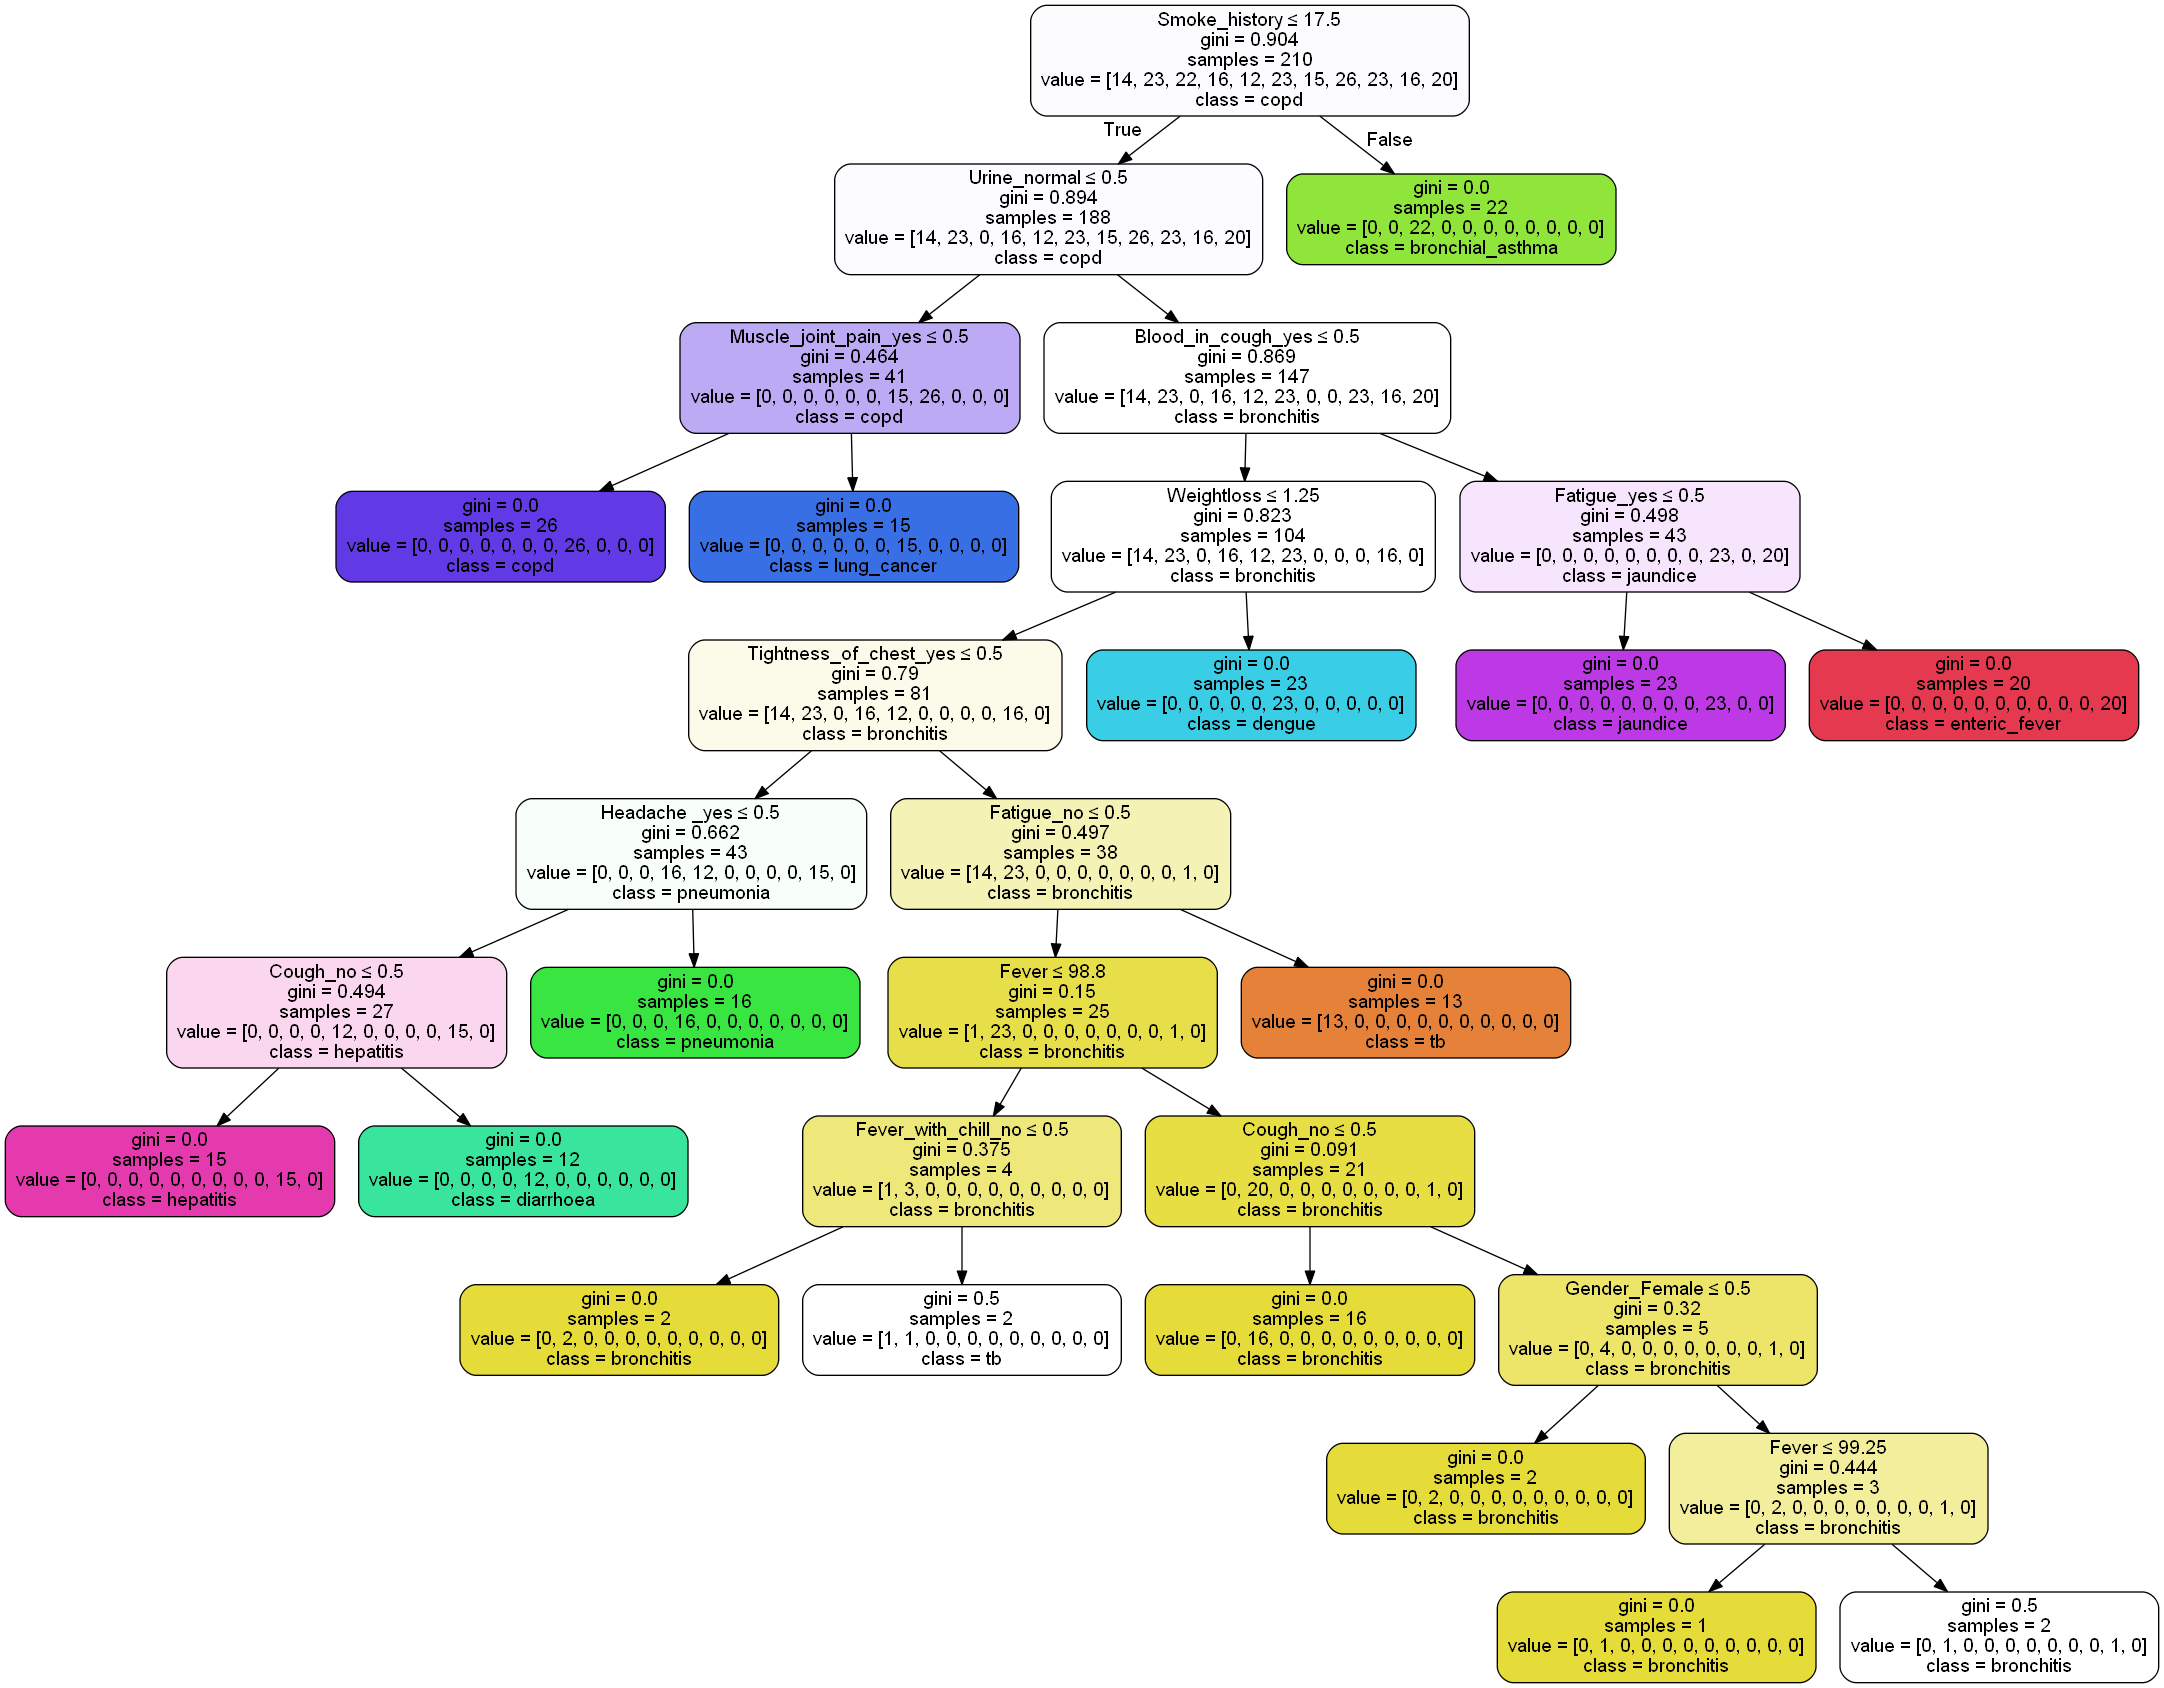

In [35]:
"""
Decision Tree Classifier with gini index

"""
gini_classifier = DecisionTreeClassifier(criterion = "gini", random_state=100)
gini_classifier.fit(train_feature, train_target)

plot_tree(gini_classifier, train_feature.columns, targets)

In [36]:
# print(gini_classifier.predict([[1, 1, 0, 2.5, 100.0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1]]))

In [37]:
"""
Prediction and report using set of test data for 'gini index' classifier
 
"""

gini_pred = gini_classifier.predict(test_feature) # prediction using gini classifier

gini_matrix = confusion_matrix(test_target, gini_pred)

print("Confusion Matrix using gini: \n")
print(gini_matrix)
print("\nClassification Report using gini: \n")
print(classification_report(test_target, gini_pred)) 

gini_accuracy = accuracy_score(gini_matrix)*100
print("\nAccuracy score: ", "%.2f" % gini_accuracy, "%")

Confusion Matrix using gini: 

[[ 7  0  0  0  0  0  0  0  0  0  0]
 [ 1  4  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0  0  0  0]
 [ 0  0  0  0  8  0  0  0  0  0  2]
 [ 0  0  0  0  0 12  0  0  0  0  0]
 [ 0  0  0  0  0  0  5  0  0  0  0]
 [ 0  0  0  0  0  0  0 12  0  0  0]
 [ 0  0  0  0  0  0  0  0  9  0  0]
 [ 0  0  0  0  0  0  0  0  0  6  0]
 [ 0  0  0  0  0  0  0  0  0  0 10]]

Classification Report using gini: 

                  precision    recall  f1-score   support

bronchial_asthma       0.88      1.00      0.93         7
      bronchitis       1.00      0.80      0.89         5
            copd       1.00      1.00      1.00        10
          dengue       1.00      1.00      1.00         4
       diarrhoea       1.00      0.80      0.89        10
   enteric_fever       1.00      1.00      1.00        12
       hepatitis       1.00      1.00      1.00         5
        jaundice       1.00      1.00      1.00        12
     lung_ca

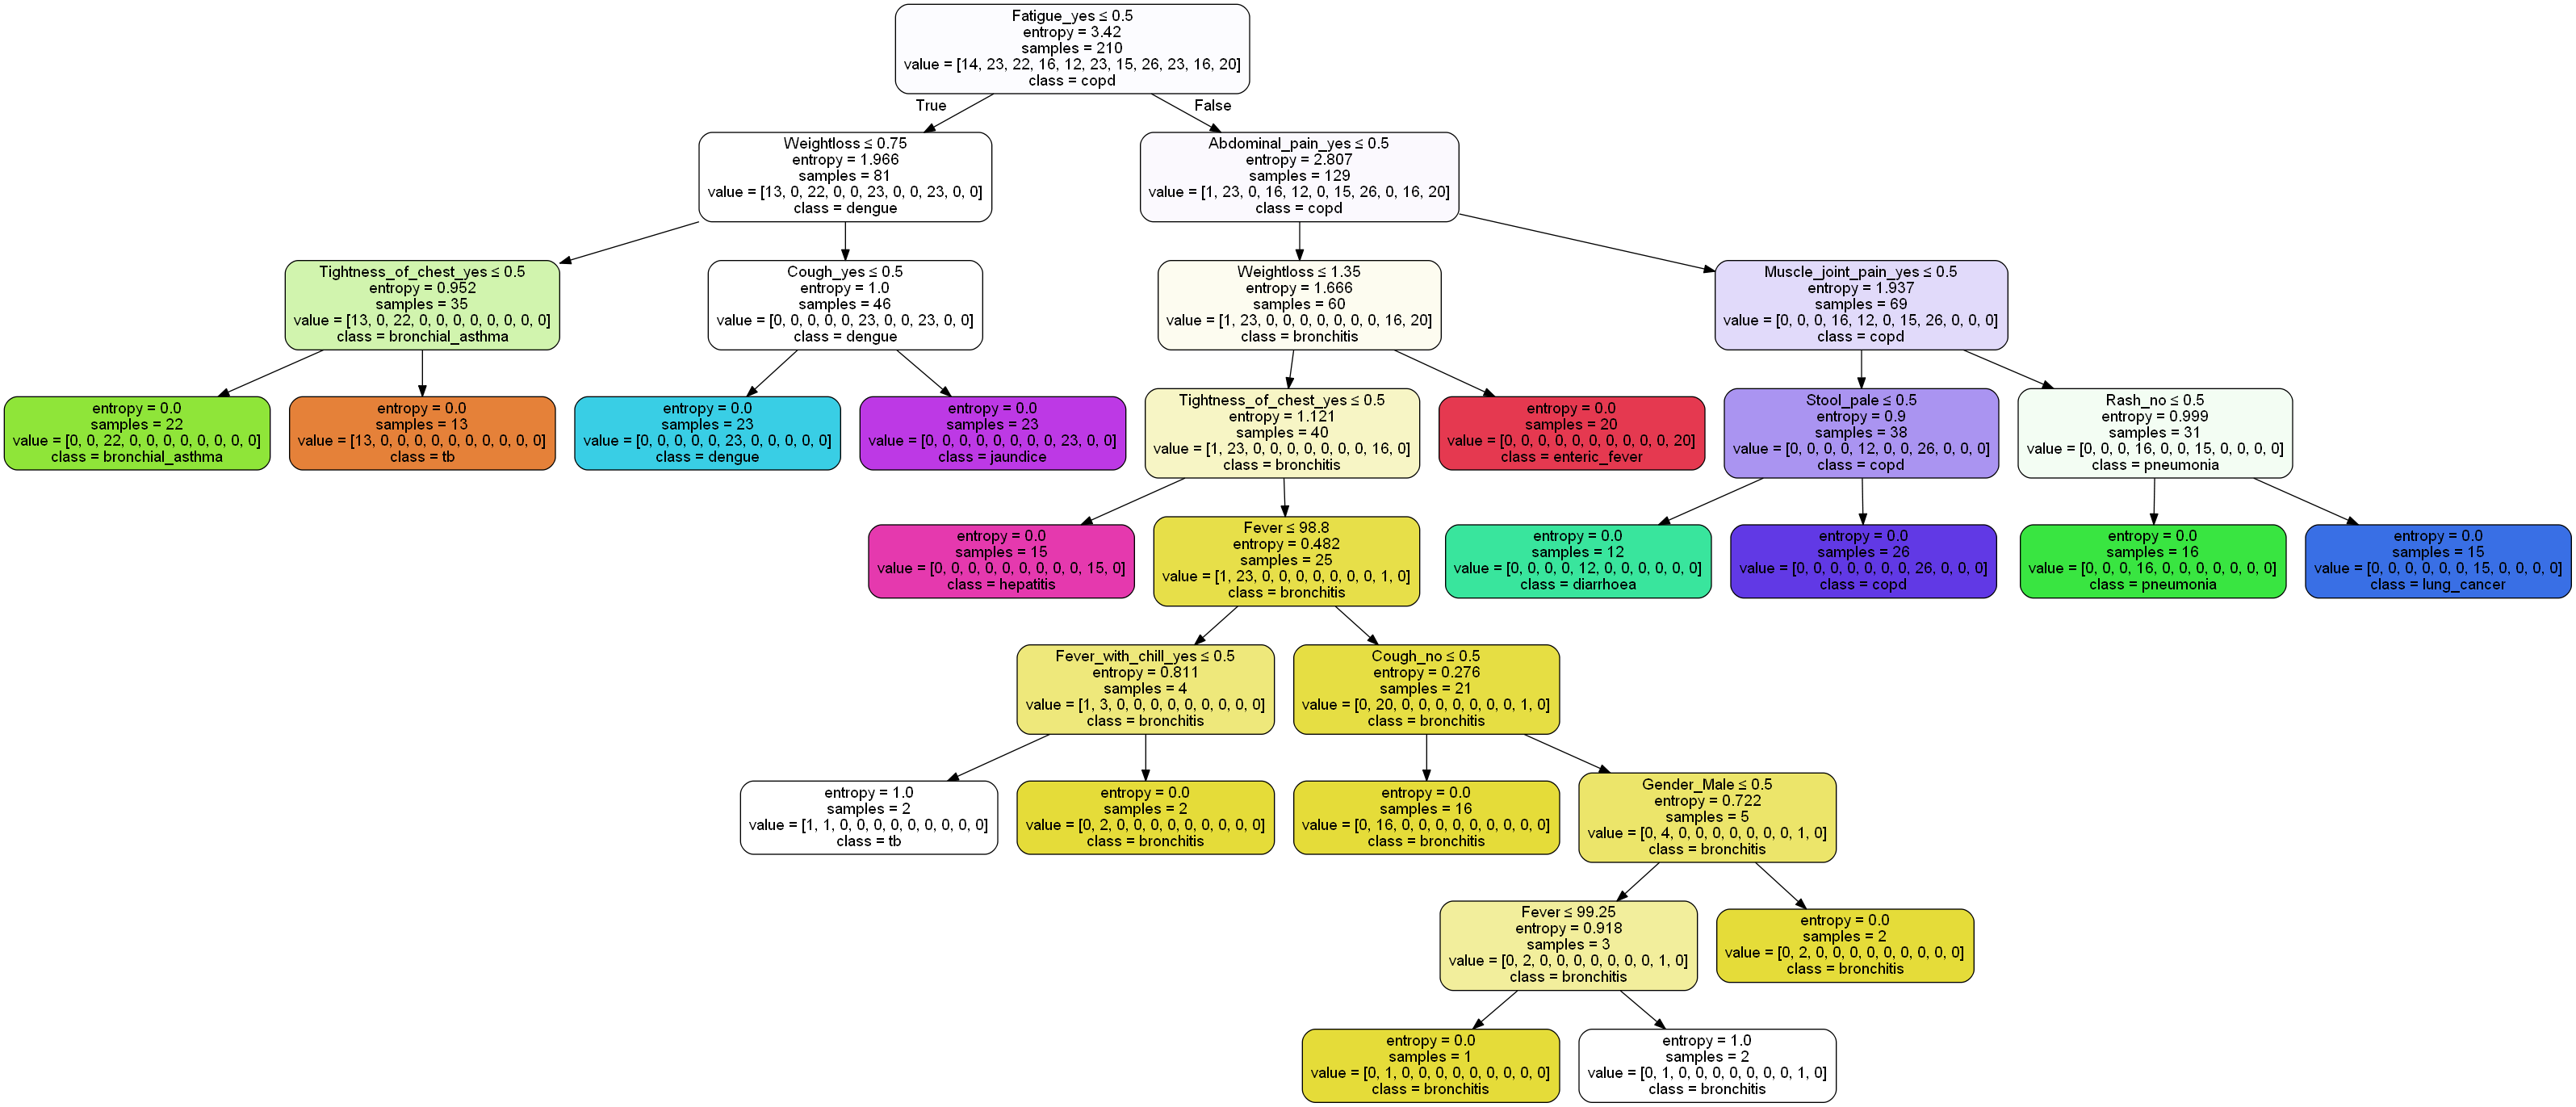

In [38]:
"""
Decision Tree Classifier with entropy gain

"""

entropy_classifier = DecisionTreeClassifier(criterion = "entropy", random_state=100)
entropy_classifier.fit(train_feature, train_target)

plot_tree(entropy_classifier, train_feature.columns, targets)

In [39]:
"""
Prediction and report using set of test data for 'entropy' classifier

"""

entro_pred = entropy_classifier.predict(test_feature) # prediction using entropy classfier

entropy_matrix = confusion_matrix(test_target, entro_pred)

print("Confusion Matrix using entropy: \n")
print(confusion_matrix(test_target, entro_pred))  
print("\nClassification Report using entropy: \n")
print(classification_report(test_target, entro_pred)) 

entropy_accuracy = accuracy_score(entropy_matrix)*100
print("\nAccuracy score: ", "%.2f" %entropy_accuracy, "%")

Confusion Matrix using entropy: 

[[ 7  0  0  0  0  0  0  0  0  0  0]
 [ 1  4  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0  0]
 [ 0  0  0  0  0 12  0  0  0  0  0]
 [ 0  0  0  0  0  0  5  0  0  0  0]
 [ 0  0  0  0  0  0  0 12  0  0  0]
 [ 0  0  0  0  0  0  0  0  9  0  0]
 [ 0  0  0  0  0  0  0  0  0  6  0]
 [ 0  0  0  0  0  0  0  0  0  0 10]]

Classification Report using entropy: 

                  precision    recall  f1-score   support

bronchial_asthma       0.88      1.00      0.93         7
      bronchitis       1.00      0.80      0.89         5
            copd       1.00      1.00      1.00        10
          dengue       1.00      1.00      1.00         4
       diarrhoea       1.00      1.00      1.00        10
   enteric_fever       1.00      1.00      1.00        12
       hepatitis       1.00      1.00      1.00         5
        jaundice       1.00      1.00      1.00        12
     l